<a href="https://colab.research.google.com/github/shahdelmasry12/Data-Mining-Project/blob/main/Clustering__E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
url="https://raw.githubusercontent.com/shahdelmasry12/Data-Mining-Project/refs/heads/main/ecommerce_customer_behavior_dataset_v2.csv"
df = pd.read_csv(url)
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  17049 non-null  object 
 1   Customer_ID               17049 non-null  object 
 2   Date                      17049 non-null  object 
 3   Age                       17049 non-null  int64  
 4   Gender                    17049 non-null  object 
 5   City                      17049 non-null  object 
 6   Product_Category          17049 non-null  object 
 7   Unit_Price                17049 non-null  float64
 8   Quantity                  17049 non-null  int64  
 9   Discount_Amount           17049 non-null  float64
 10  Total_Amount              17049 non-null  float64
 11  Payment_Method            17049 non-null  object 
 12  Device_Type               17049 non-null  object 
 13  Session_Duration_Minutes  17049 non-null  int64  
 14  Pages_

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000
mean,34.945745,447.901689,3.011379,69.788135,1277.438711,14.535633,9.003109,6.503607,3.899408
std,11.046855,722.319705,1.417027,240.704662,2358.436375,2.925524,2.259954,3.488787,1.128803
min,18.000000,5.050000,1.000000,0.000000,6.210000,4.000000,1.000000,1.000000,1.000000
25%,26.000000,73.260000,2.000000,0.000000,172.970000,13.000000,7.000000,4.000000,3.000000
50%,35.000000,174.680000,3.000000,0.000000,455.850000,15.000000,9.000000,6.000000,4.000000
75%,42.000000,494.570000,4.000000,32.710000,1267.750000,17.000000,11.000000,8.000000,5.000000
max,75.000000,7900.010000,5.000000,6538.290000,37852.050000,26.000000,18.000000,25.000000,5.000000


In [ ]:
numerical_cols = [
    'Age',
    'Total_Amount',
    'Session_Duration_Minutes',
    'Pages_Viewed',
    'Delivery_Time_Days',
    'Customer_Rating'
]


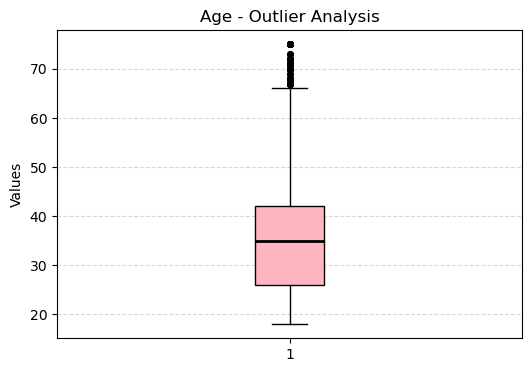

Missing values in Age: 0
Min / Max in Age: 18 / 75
--------------------------------------------------


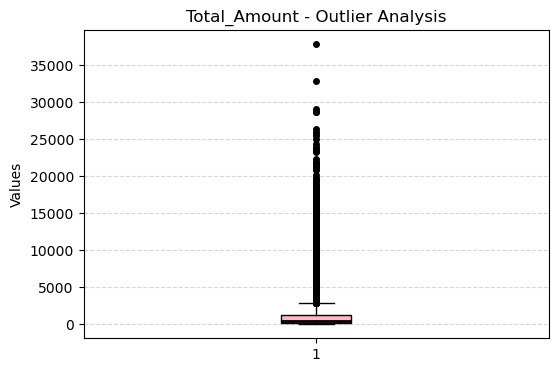

Missing values in Total_Amount: 0
Min / Max in Total_Amount: 6.21 / 37852.05
--------------------------------------------------


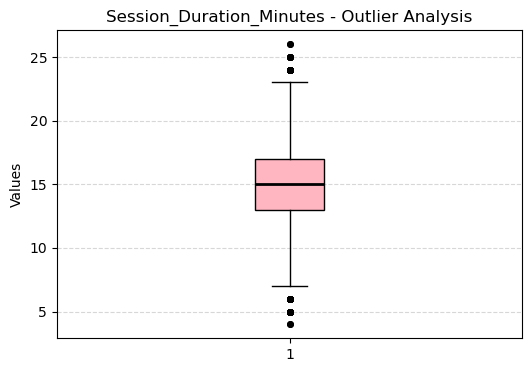

Missing values in Session_Duration_Minutes: 0
Min / Max in Session_Duration_Minutes: 4 / 26
--------------------------------------------------


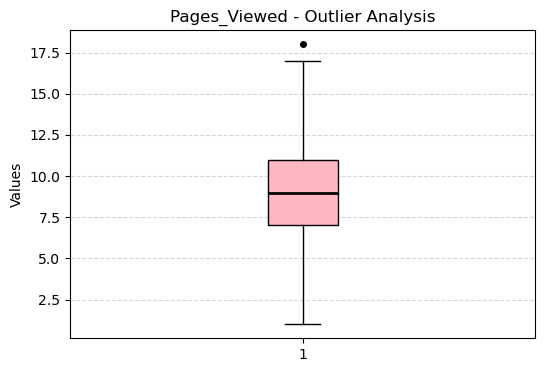

Missing values in Pages_Viewed: 0
Min / Max in Pages_Viewed: 1 / 18
--------------------------------------------------


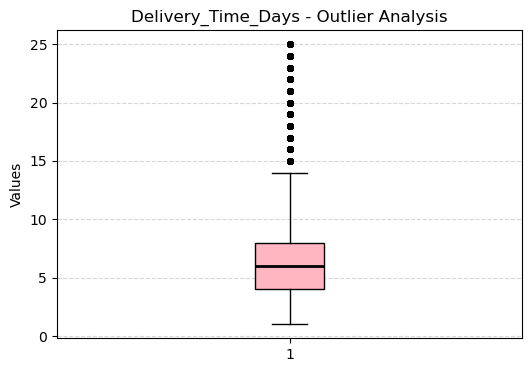

Missing values in Delivery_Time_Days: 0
Min / Max in Delivery_Time_Days: 1 / 25
--------------------------------------------------


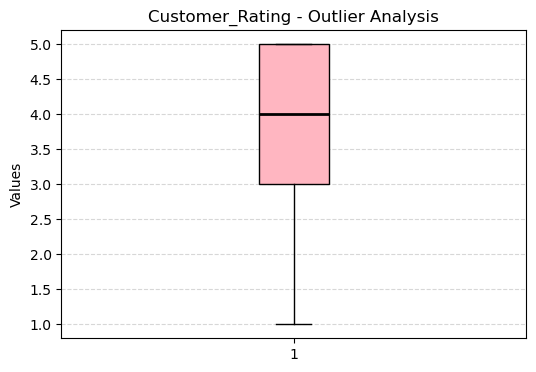

Missing values in Customer_Rating: 0
Min / Max in Customer_Rating: 1 / 5
--------------------------------------------------


In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))

    plt.boxplot(
        df[col],
        patch_artist=True,
        boxprops=dict(facecolor='lightpink', color='black'),
        medianprops=dict(color='black', linewidth=2),
        flierprops=dict(
            marker='o',
            markerfacecolor='black',
            markeredgecolor='black',
            markersize=4,
            linestyle='none'
        )
    )

    plt.title(f"{col} - Outlier Analysis")
    plt.ylabel("Values")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    print(f"Missing values in {col}: {df[col].isna().sum()}")
    print(f"Min / Max in {col}: {df[col].min()} / {df[col].max()}")
    print("-" * 50)


In [ ]:
df_capped = df.copy()

for col in numerical_cols:
    q1 = df_capped[col].quantile(0.25)
    q3 = df_capped[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    df_capped[col] = np.where(
        df_capped[col] < lower, lower,
        np.where(df_capped[col] > upper, upper, df_capped[col])
    )


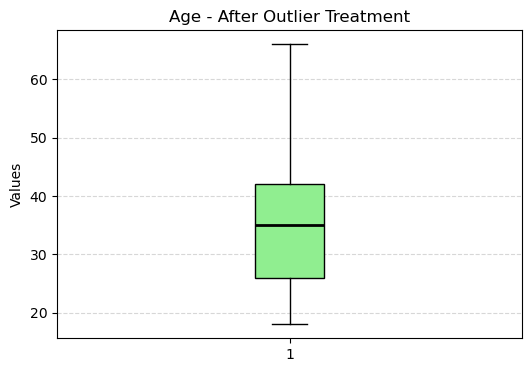

Missing values in Age: 0
Min / Max in Age: 18.0 / 66.0
--------------------------------------------------


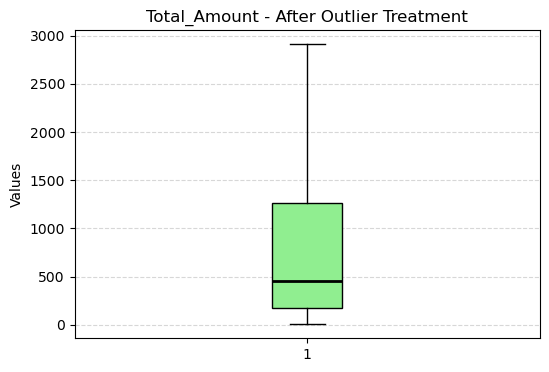

Missing values in Total_Amount: 0
Min / Max in Total_Amount: 6.21 / 2909.92
--------------------------------------------------


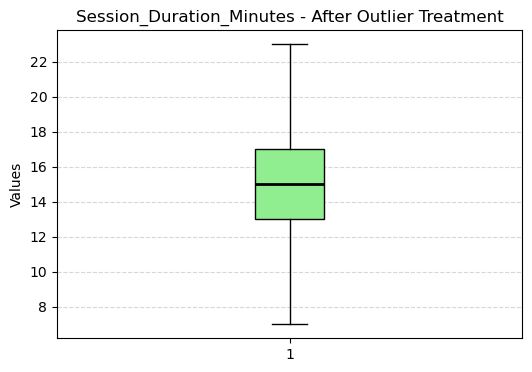

Missing values in Session_Duration_Minutes: 0
Min / Max in Session_Duration_Minutes: 7.0 / 23.0
--------------------------------------------------


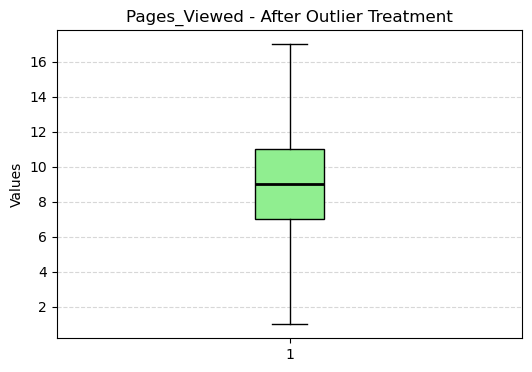

Missing values in Pages_Viewed: 0
Min / Max in Pages_Viewed: 1.0 / 17.0
--------------------------------------------------


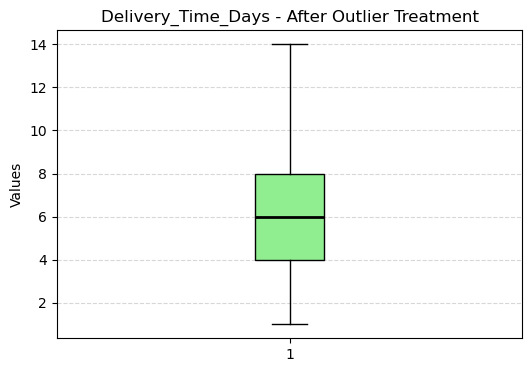

Missing values in Delivery_Time_Days: 0
Min / Max in Delivery_Time_Days: 1.0 / 14.0
--------------------------------------------------


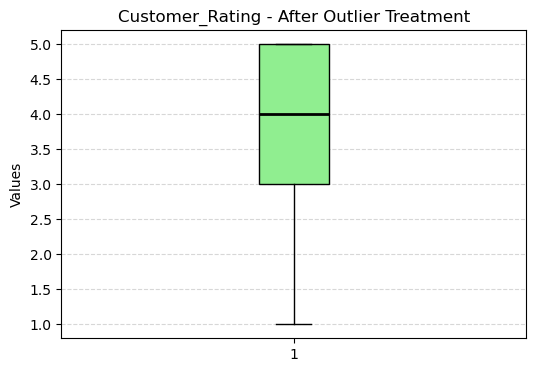

Missing values in Customer_Rating: 0
Min / Max in Customer_Rating: 1.0 / 5.0
--------------------------------------------------


In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))

    plt.boxplot(
        df_capped[col],
        patch_artist=True,
        boxprops=dict(facecolor='lightgreen', color='black'),
        medianprops=dict(color='black', linewidth=2),
        flierprops=dict(
            marker='o',
            markerfacecolor='black',
            markeredgecolor='black',
            markersize=4,
            linestyle='none'
        )
    )

    plt.title(f"{col} - After Outlier Treatment")
    plt.ylabel("Values")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    print(f"Missing values in {col}: {df_capped[col].isna().sum()}")
    print(f"Min / Max in {col}: {df_capped[col].min()} / {df_capped[col].max()}")
    print("-" * 50)


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_capped[numerical_cols])


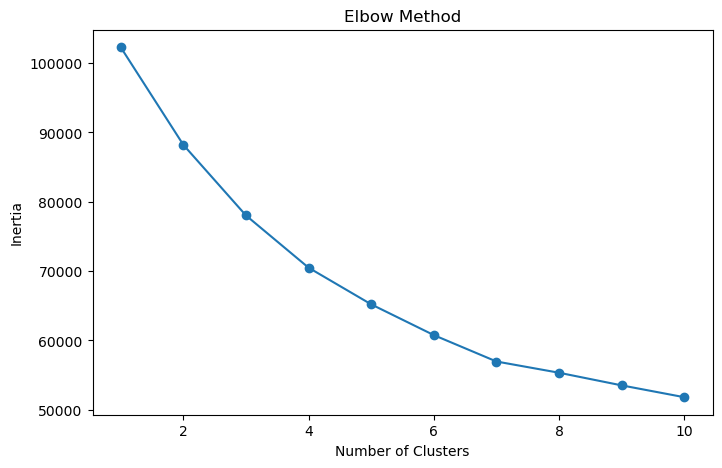

In [ ]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_capped['Cluster'] = kmeans.fit_predict(df_scaled)


In [ ]:
df_capped['Cluster'].value_counts()


Cluster
1    6719
0    3624
3    3547
2    3159
Name: count, dtype: int64

In [ ]:
cluster_summary = df_capped.groupby('Cluster')[numerical_cols].mean()
cluster_summary


,Age,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
Cluster,,,,,,
0,34.448951,504.125030,14.347958,9.159768,10.704194,4.201159
1,35.028725,440.322128,14.662599,8.914571,4.662896,4.530436
2,35.036404,2622.588088,14.421336,9.011079,6.202912,4.060779
3,35.147730,562.093025,14.603327,9.003383,5.524105,2.252044


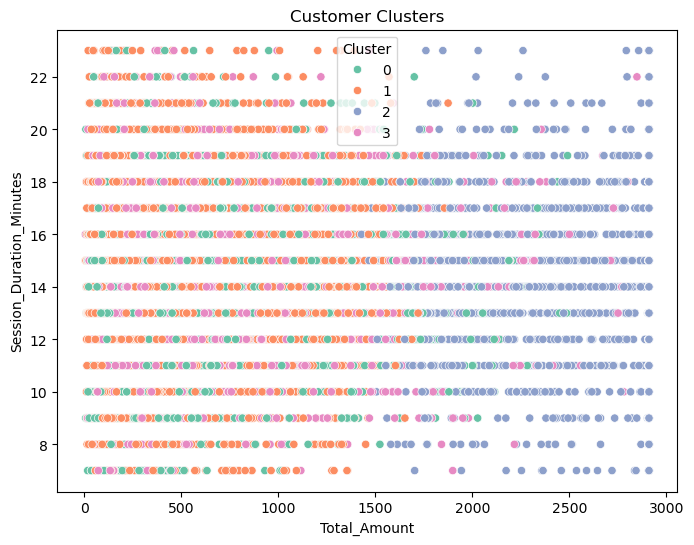

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_capped['Total_Amount'],
    y=df_capped['Session_Duration_Minutes'],
    hue=df_capped['Cluster'],
    palette='Set2'
)
plt.title("Customer Clusters")
plt.show()
